# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [ ]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

In [ ]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [ ]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## Check the Version of TensorFlow and Access to GPU

This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

## Train Agent on Pendulum Task
Use Pendulum task from OpenAI gym.

In [1]:
import matplotlib.pyplot as plt

# you must include '%matplotlib notebook' for this to work
##%matplotlib notebook

time_limit = 100
y1_lower = -50
y1_upper = 0
y2_lower = -1
y2_upper = 1

# generate plot function
def plt_dynamic(fig, sub1, sub2, x, y1, y2, color_y1='g', color_y2='b'):
   sub1.plot(x, y1, color_y1)
   sub2.plot(x, y2, color_y2)
   fig.canvas.draw()

def plt_clear(fig):
    fig.clear()

def plt_init():
    # create plots
    fig, sub1= plt.subplots(1,1)
    sub2 = sub1.twinx()

    # set plot boundaries
    sub1.set_xlim(0, time_limit) # this is typically time
    sub1.set_ylim(y1_lower, y1_upper) # limits to your y1
    sub2.set_xlim(0, time_limit) # time, again
    sub2.set_ylim(y2_lower, y2_upper) # limits to your y2

    # set labels and colors for the axes
    sub1.set_xlabel('time (s)', color='k') 
    sub1.set_ylabel('y1-axis label', color='g')
    sub1.tick_params(axis='x', colors='k')
    sub1.tick_params(axis='y', colors="g")

    sub2.set_ylabel('y2-axis label', color='b') 
    sub2.tick_params(axis='y', colors='b')
    
    return fig, sub1, sub2
    

Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode =    1, total reward = -1807.069
Episode =    2, total reward = -2158.361
Episode =    3, total reward = -2402.099
Episode =    4, total reward = -2149.637
Episode =    5, total reward = -2138.601
Episode =    6, total reward = -1897.273
Episode =    7, total reward = -1796.223
Episode =    8, total reward = -1991.408
Episode =    9, total reward = -2335.088
Episode =   10, total reward = -2646.627
Episode =   11, total reward = -2159.467
Episode =   12, total reward = -2811.475
Episode =   13, total reward = -2738.704
Episode =   14, total reward = -2798.940
Episode =   15, total reward = -2851.786
Episode =   16, total reward = -2851.904
Episode =   17, total reward = -2762.473
Episode =   18, total reward = -2760.923
Episode =   19, total reward = -2499.713
Episode =   20, total r

<IPython.core.display.Javascript object>


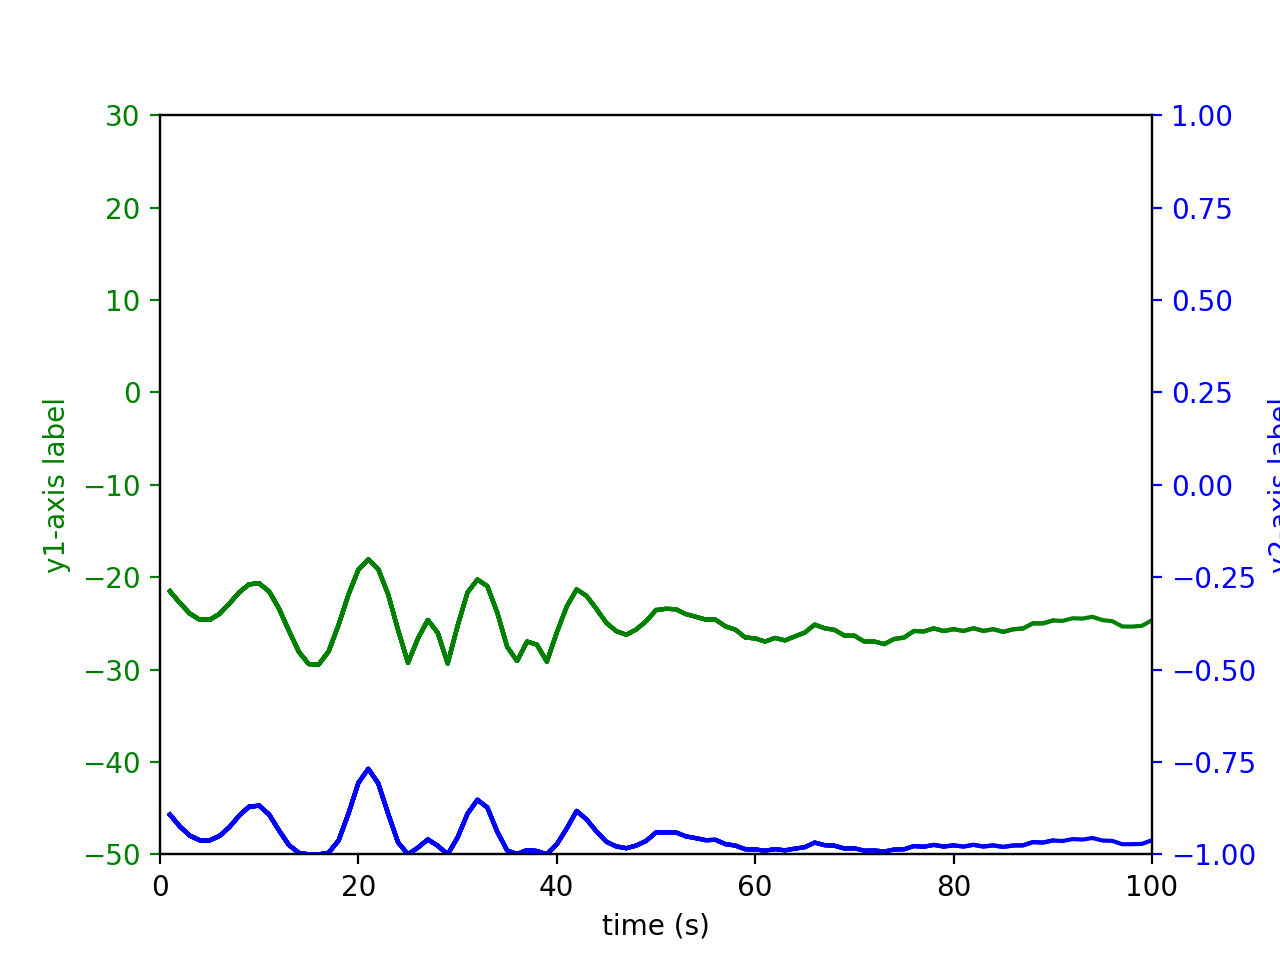

Episode =   50, total reward = -2519.124
Episode =   51, total reward = -2541.005
Episode =   52, total reward = -2291.095
Episode =   53, total reward = -2114.422
Episode =   54, total reward = -2646.836
Episode =   55, total reward = -2464.297
Episode =   56, total reward = -2250.338
Episode =   57, total reward = -2246.962
Episode =   58, total reward = -1893.988
Episode =   59, total reward = -2249.177
Episode =   60, total reward = -2126.007
Episode =   61, total reward = -2217.314
Episode =   62, total reward = -2482.991
Episode =   63, total reward = -2434.580
Episode =   64, total reward = -2143.248
Episode =   65, total reward = -2642.800
Episode =   66, total reward = -2552.981
Episode =   67, total reward = -2485.053
Episode =   68, total reward = -2503.795
Episode =   69, total reward = -2664.573
Episode =   70, total reward = -2620.195
Episode =   71, total reward = -2846.202
Episode =   72, total reward = -2788.739
Episode =   73, total reward = -2548.419
Episode =   74, 

<IPython.core.display.Javascript object>


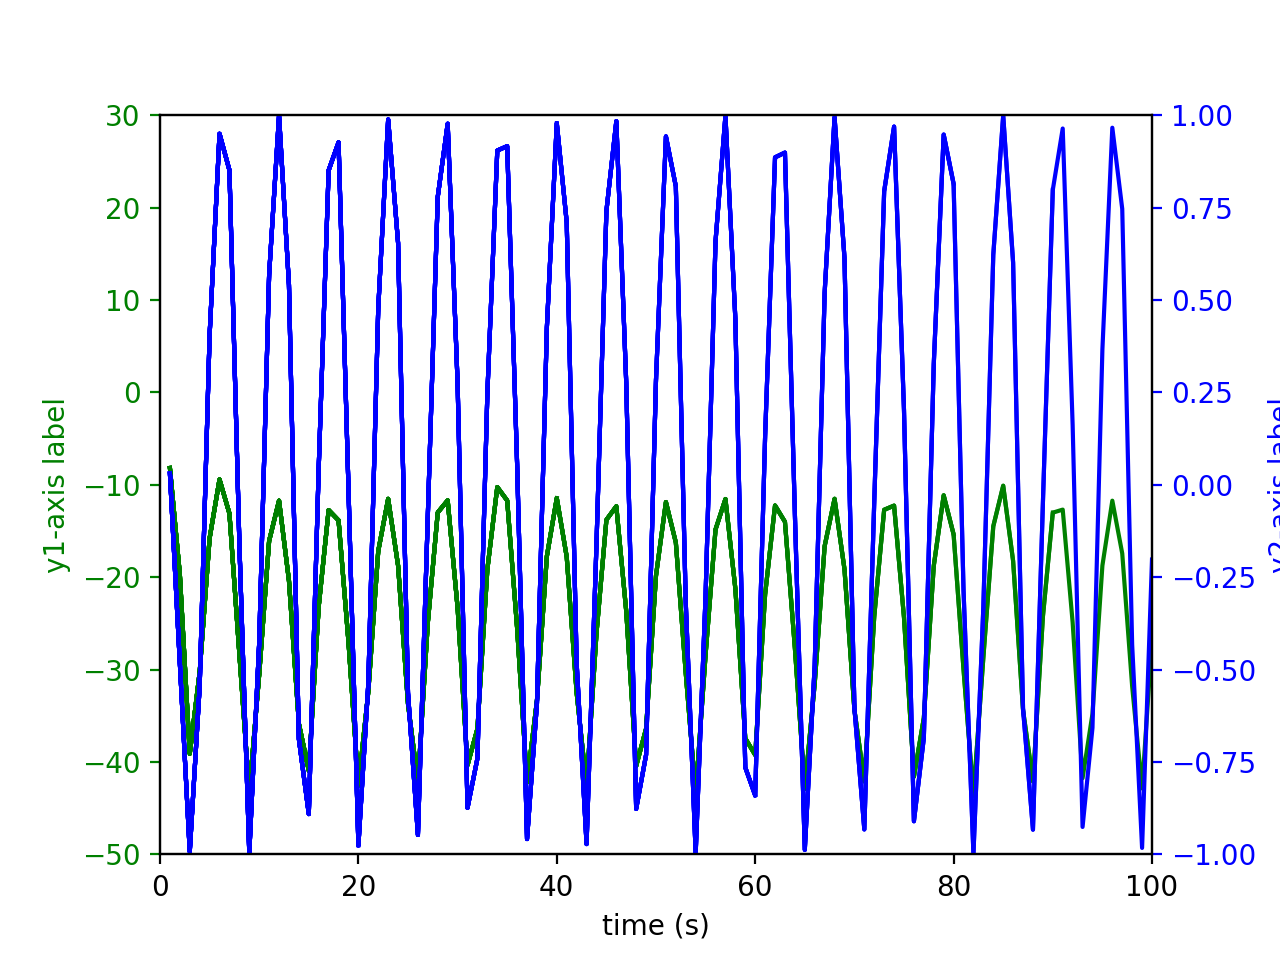

Episode =  100, total reward = -2484.924
Episode =  101, total reward = -2390.355
Episode =  102, total reward = -2402.453
Episode =  103, total reward = -1425.375
Episode =  104, total reward = -1903.936
Episode =  105, total reward = -2062.191
Episode =  106, total reward = -2377.438
Episode =  107, total reward = -1546.004
Episode =  108, total reward = -2141.024
Episode =  109, total reward = -2183.230
Episode =  110, total reward = -2478.207
Episode =  111, total reward = -1461.126
Episode =  112, total reward = -2087.020
Episode =  113, total reward = -2245.885
Episode =  114, total reward = -2344.854
Episode =  115, total reward = -2321.830
Episode =  116, total reward = -2071.792
Episode =  117, total reward = -2370.831
Episode =  118, total reward = -2478.694
Episode =  119, total reward = -2470.490
Episode =  120, total reward = -2414.605
Episode =  121, total reward = -2289.023
Episode =  122, total reward = -2443.712
Episode =  123, total reward = -2397.098
Episode =  124, 

<IPython.core.display.Javascript object>


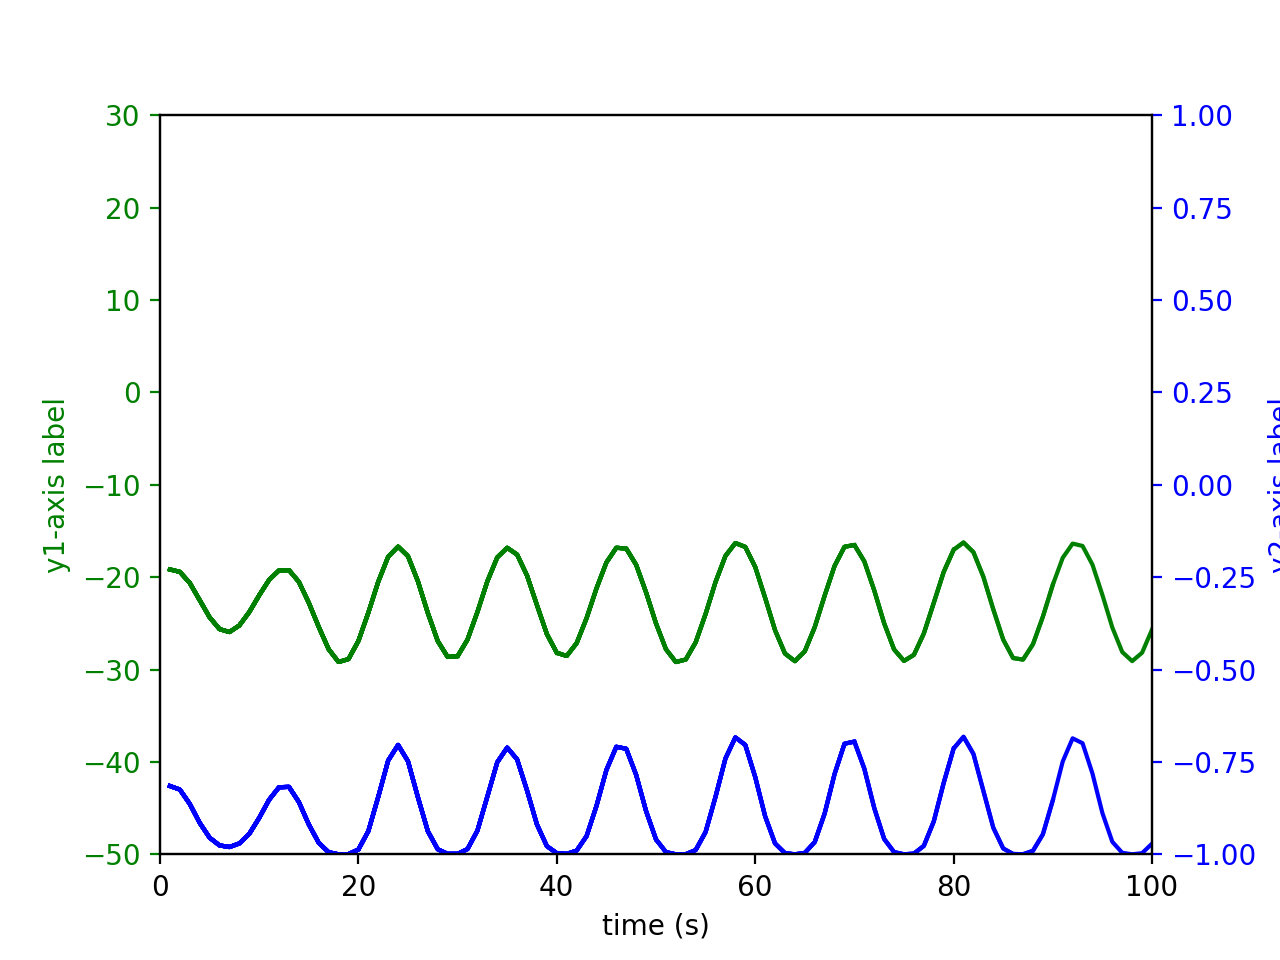

Episode =  150, total reward = -2311.798
Episode =  151, total reward = -2311.870
Episode =  152, total reward = -2235.603
Episode =  153, total reward = -2325.120
Episode =  154, total reward = -2277.249
Episode =  155, total reward = -2295.641
Episode =  156, total reward = -2256.081
Episode =  157, total reward = -2370.219
Episode =  158, total reward = -2277.324
Episode =  159, total reward = -2657.955
Episode =  160, total reward = -2491.529
Episode =  161, total reward = -1491.985
Episode =  162, total reward = -2249.489
Episode =  163, total reward = -2301.048
Episode =  164, total reward = -2065.154
Episode =  165, total reward = -2098.028
Episode =  166, total reward = -2471.636
Episode =  167, total reward = -2453.389
Episode =  168, total reward = -2457.612
Episode =  169, total reward = -1662.115
Episode =  170, total reward = -2396.456
Episode =  171, total reward = -2104.018
Episode =  172, total reward = -1647.528
Episode =  173, total reward = -2484.017
Episode =  174, 

<IPython.core.display.Javascript object>


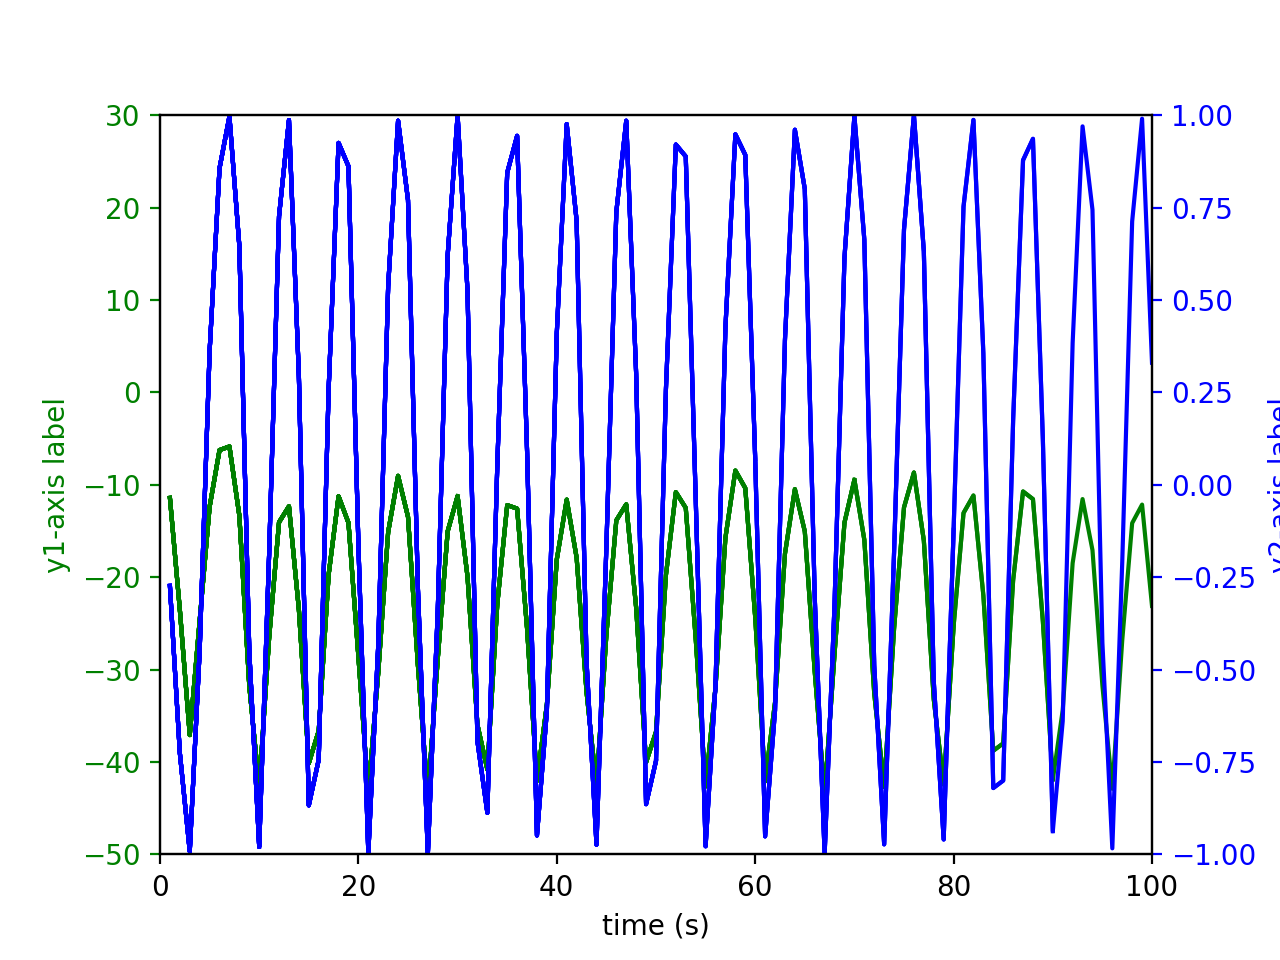

Episode =  200, total reward = -2402.695
Episode =  201, total reward = -1930.629
Episode =  202, total reward = -2475.411
Episode =  203, total reward = -1906.952
Episode =  204, total reward = -1975.056
Episode =  205, total reward = -2266.057
Episode =  206, total reward = -1661.741
Episode =  207, total reward = -2408.413
Episode =  208, total reward = -2028.682
Episode =  209, total reward = -1905.237
Episode =  210, total reward = -2344.528
Episode =  211, total reward = -2398.193
Episode =  212, total reward = -2082.821
Episode =  213, total reward = -2421.128
Episode =  214, total reward = -1958.320
Episode =  215, total reward = -2382.081
Episode =  216, total reward = -2453.042
Episode =  217, total reward = -1508.063
Episode =  218, total reward = -2020.213
Episode =  219, total reward = -1989.693
Episode =  220, total reward = -2468.281
Episode =  221, total reward = -2284.692
Episode =  222, total reward = -2054.786
Episode =  223, total reward = -2409.331
Episode =  224, 

<IPython.core.display.Javascript object>


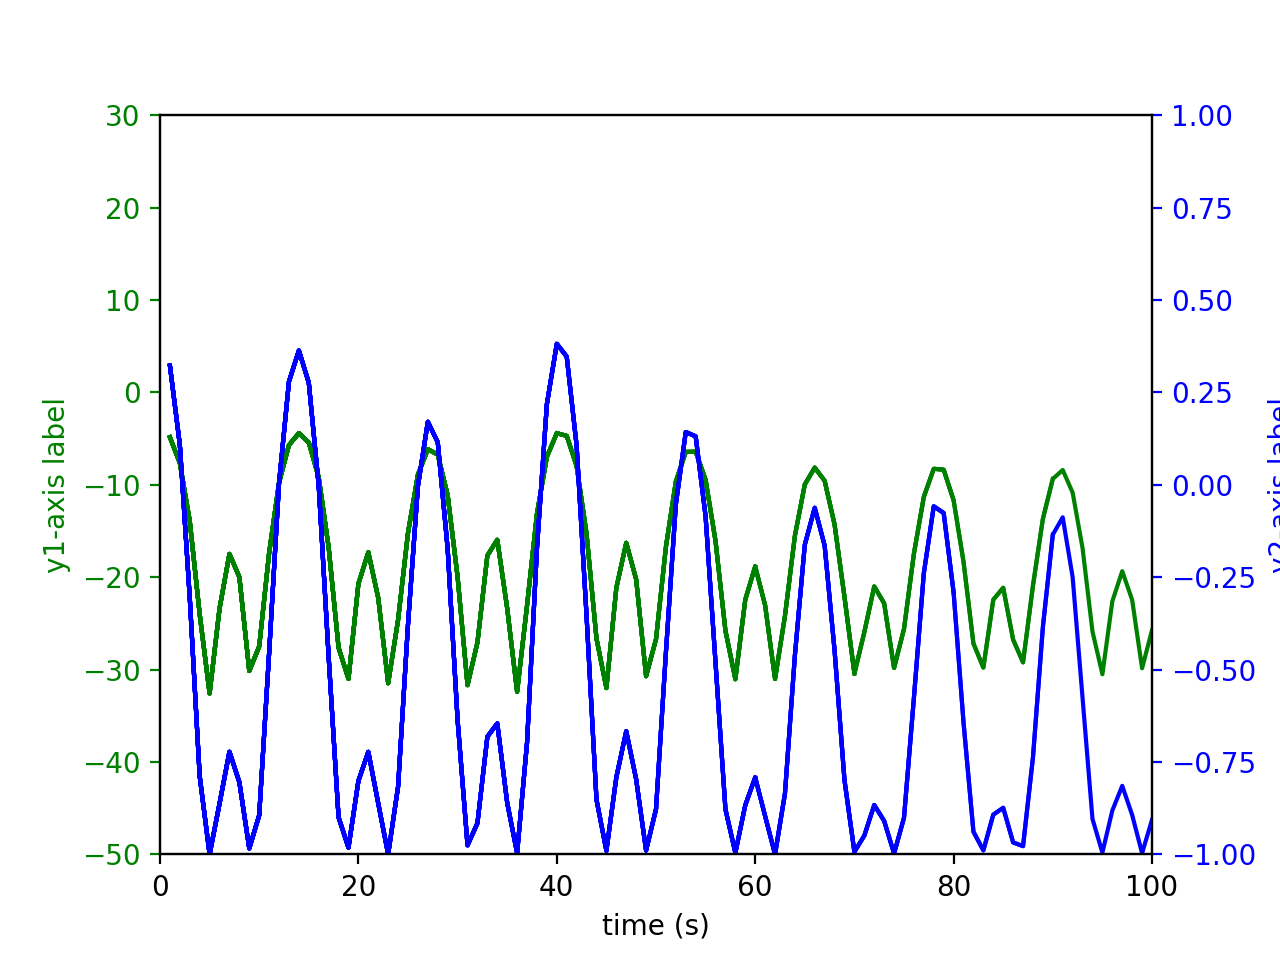

Episode =  250, total reward = -1892.949
Episode =  251, total reward = -2467.687
Episode =  252, total reward = -2266.982
Episode =  253, total reward = -2494.604
Episode =  254, total reward = -2462.792
Episode =  255, total reward = -1848.462
Episode =  256, total reward = -2041.783
Episode =  257, total reward = -2366.176
Episode =  258, total reward = -2425.562
Episode =  259, total reward = -1664.898
Episode =  260, total reward = -1788.774
Episode =  261, total reward = -1927.392
Episode =  262, total reward = -1772.569
Episode =  263, total reward = -2422.928
Episode =  264, total reward = -1515.667
Episode =  265, total reward = -2475.289
Episode =  266, total reward = -1784.295
Episode =  267, total reward = -2474.542
Episode =  268, total reward = -2457.354
Episode =  269, total reward = -2480.943
Episode =  270, total reward = -2104.820
Episode =  271, total reward = -2033.719
Episode =  272, total reward = -1659.703
Episode =  273, total reward = -2461.640
Episode =  274, 

<IPython.core.display.Javascript object>


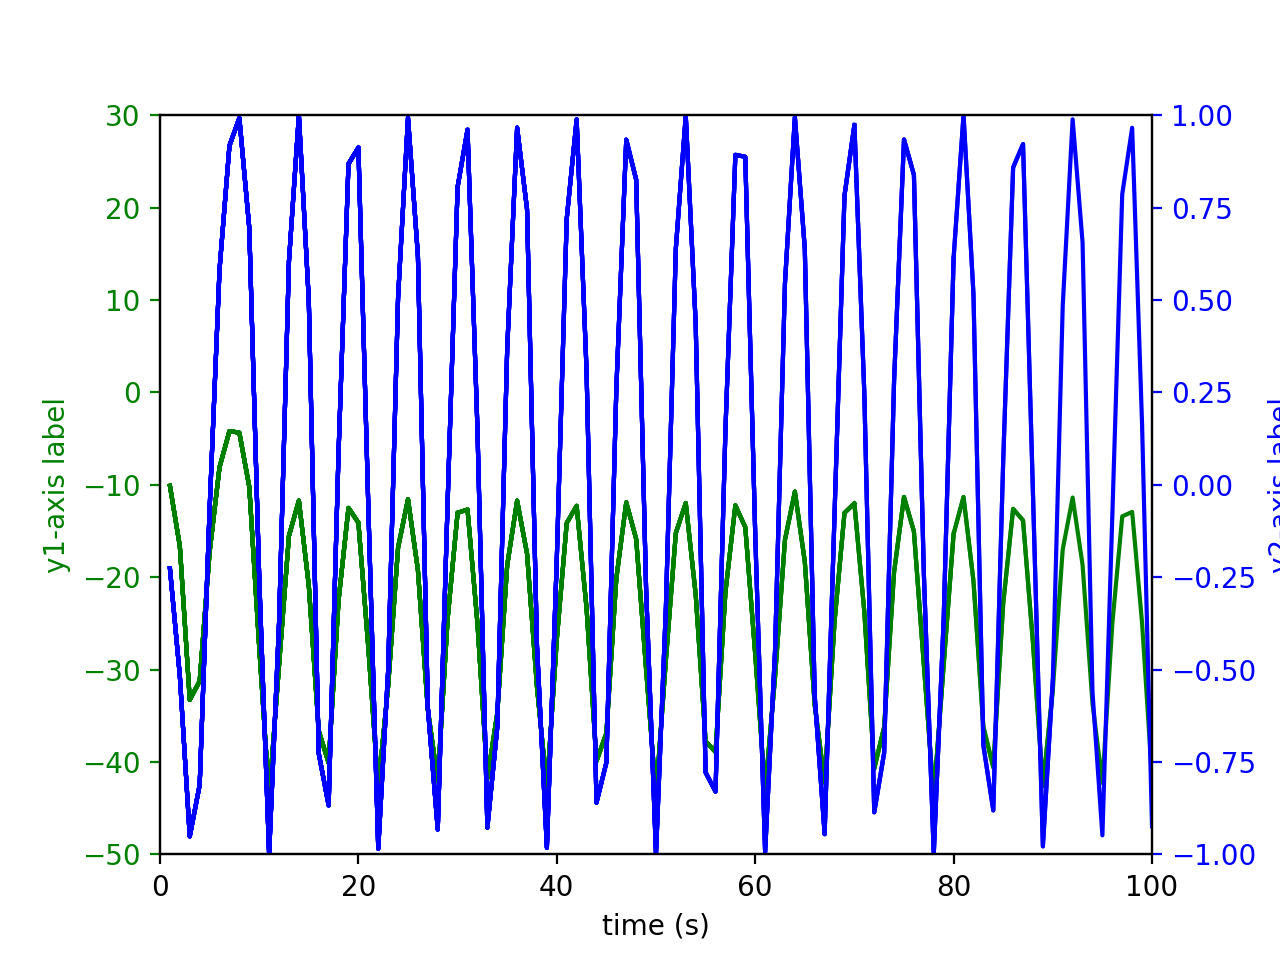

Episode =  300, total reward = -2462.015
Episode =  301, total reward = -1941.016
Episode =  302, total reward = -1477.989
Episode =  303, total reward = -1812.012
Episode =  304, total reward = -2244.798
Episode =  305, total reward = -2124.663
Episode =  306, total reward = -1630.789
Episode =  307, total reward = -2332.313
Episode =  308, total reward = -2470.724
Episode =  309, total reward = -1532.465
Episode =  310, total reward = -2319.337
Episode =  311, total reward = -2270.890
Episode =  312, total reward = -2354.612
Episode =  313, total reward = -2076.648
Episode =  314, total reward = -2350.667
Episode =  315, total reward = -2273.944
Episode =  316, total reward = -2154.238
Episode =  317, total reward = -1749.835
Episode =  318, total reward = -1824.191
Episode =  319, total reward = -2361.649
Episode =  320, total reward = -1966.882
Episode =  321, total reward = -2235.357
Episode =  322, total reward = -2047.530
Episode =  323, total reward = -1908.280
Episode =  324, 

<IPython.core.display.Javascript object>


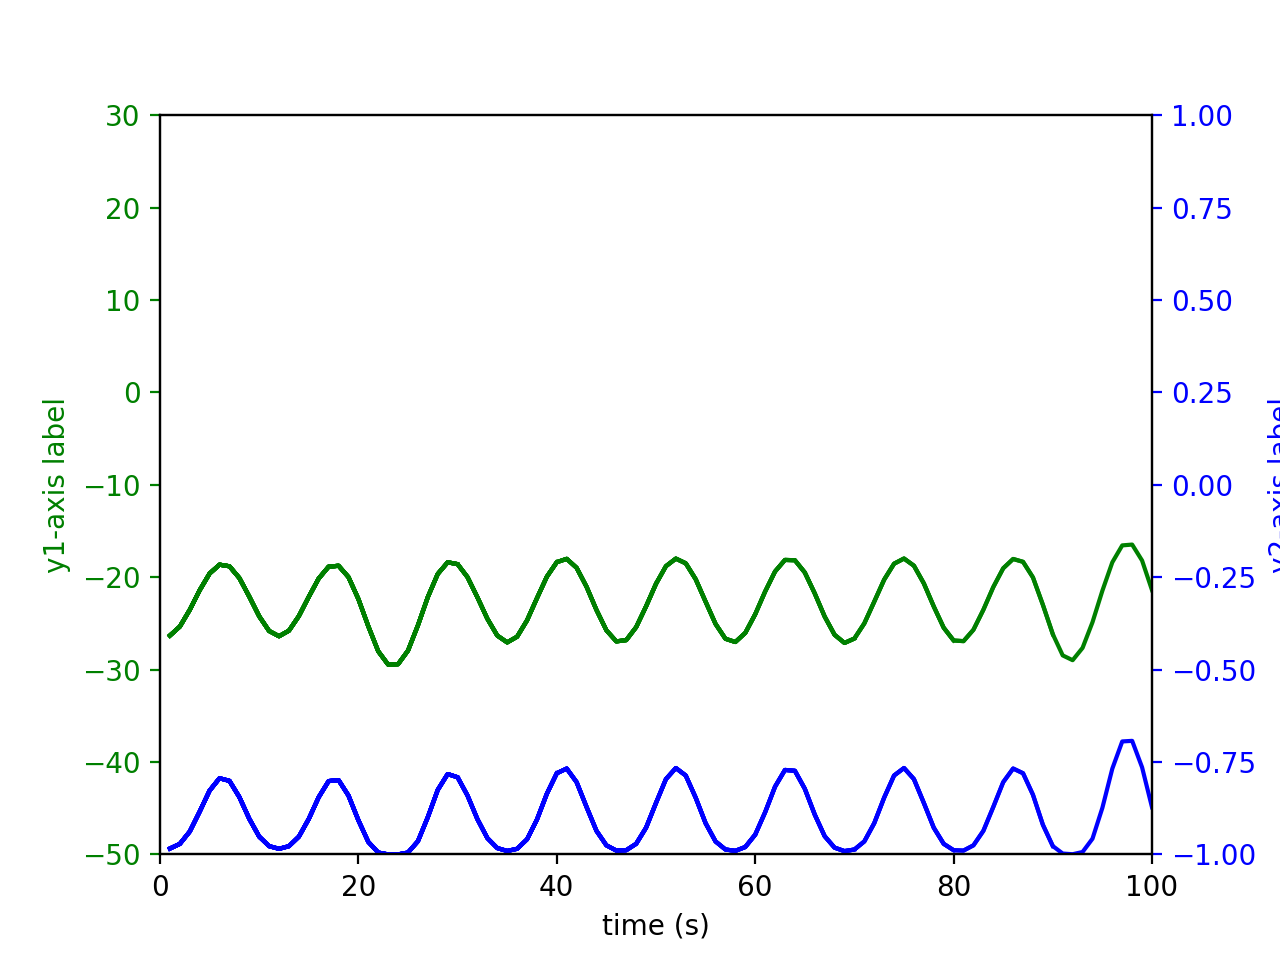

Episode =  350, total reward = -2289.196
Episode =  351, total reward = -2164.771
Episode =  352, total reward = -2445.059
Episode =  353, total reward = -1871.930
Episode =  354, total reward = -2327.578
Episode =  355, total reward = -2464.570
Episode =  356, total reward = -2167.724
Episode =  357, total reward = -2423.695
Episode =  358, total reward = -2478.595
Episode =  359, total reward = -2494.196
Episode =  360, total reward = -1980.238
Episode =  361, total reward = -1632.442
Episode =  362, total reward = -2343.247
Episode =  363, total reward = -2110.423
Episode =  364, total reward = -1894.683
Episode =  365, total reward = -2385.560
Episode =  366, total reward = -2447.901
Episode =  367, total reward = -2083.495
Episode =  368, total reward = -2022.680
Episode =  369, total reward = -2468.269
Episode =  370, total reward = -2284.916
Episode =  371, total reward = -1631.122
Episode =  372, total reward = -1545.611
Episode =  373, total reward = -2095.760
Episode =  374, 

<IPython.core.display.Javascript object>


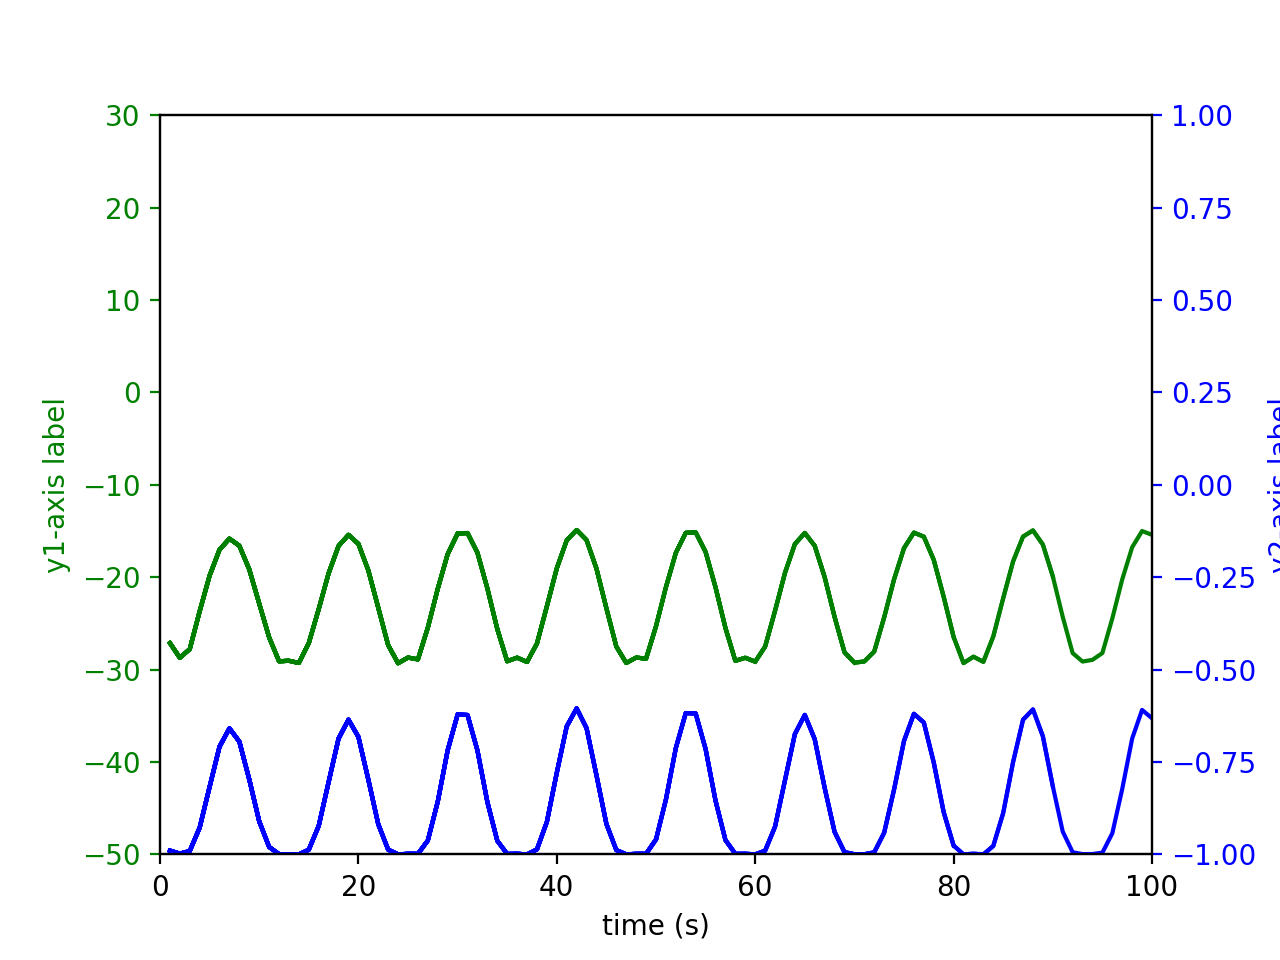

Episode =  400, total reward = -2277.820
Episode =  401, total reward = -2486.186
Episode =  402, total reward = -1766.140
Episode =  403, total reward = -2295.774
Episode =  404, total reward = -2300.668
Episode =  405, total reward = -2328.089
Episode =  406, total reward = -2383.212
Episode =  407, total reward = -2148.845
Episode =  408, total reward = -1773.512
Episode =  409, total reward = -2265.698
Episode =  410, total reward = -2285.828
Episode =  411, total reward = -1784.972
Episode =  412, total reward = -2124.694
Episode =  413, total reward = -2415.646
Episode =  414, total reward = -1700.946
Episode =  415, total reward = -2284.847
Episode =  416, total reward = -2487.313
Episode =  417, total reward = -2462.412
Episode =  418, total reward = -2488.456
Episode =  419, total reward = -2467.104
Episode =  420, total reward = -2318.741
Episode =  421, total reward = -2209.077
Episode =  422, total reward = -1816.061
Episode =  423, total reward = -2477.279
Episode =  424, 

<IPython.core.display.Javascript object>


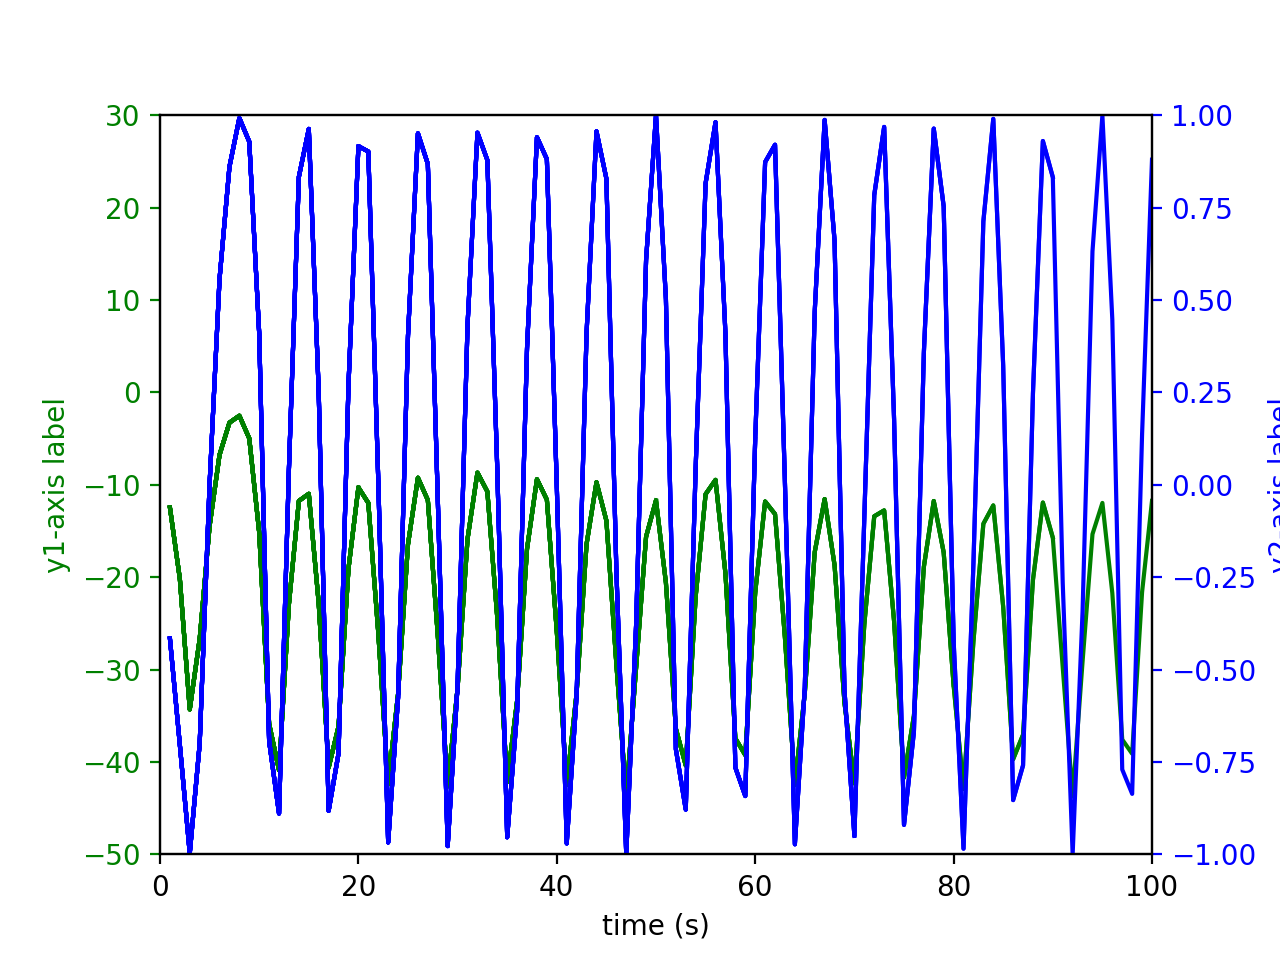

Episode =  450, total reward = -2346.731
Episode =  451, total reward = -2334.165
Episode =  452, total reward = -1584.565
Episode =  453, total reward = -2448.668
Episode =  454, total reward = -2305.342
Episode =  455, total reward = -2180.534
Episode =  456, total reward = -1971.034
Episode =  457, total reward = -2425.606
Episode =  458, total reward = -2183.026
Episode =  459, total reward = -2465.678
Episode =  460, total reward = -2309.429
Episode =  461, total reward = -1445.245
Episode =  462, total reward = -2306.075
Episode =  463, total reward = -2342.598
Episode =  464, total reward = -2312.465
Episode =  465, total reward = -2178.545
Episode =  466, total reward = -2289.083
Episode =  467, total reward = -2464.890
Episode =  468, total reward = -2265.446
Episode =  469, total reward = -2469.007
Episode =  470, total reward = -2457.054
Episode =  471, total reward = -1641.145
Episode =  472, total reward = -2482.407
Episode =  473, total reward = -2165.933
Episode =  474, 

<IPython.core.display.Javascript object>


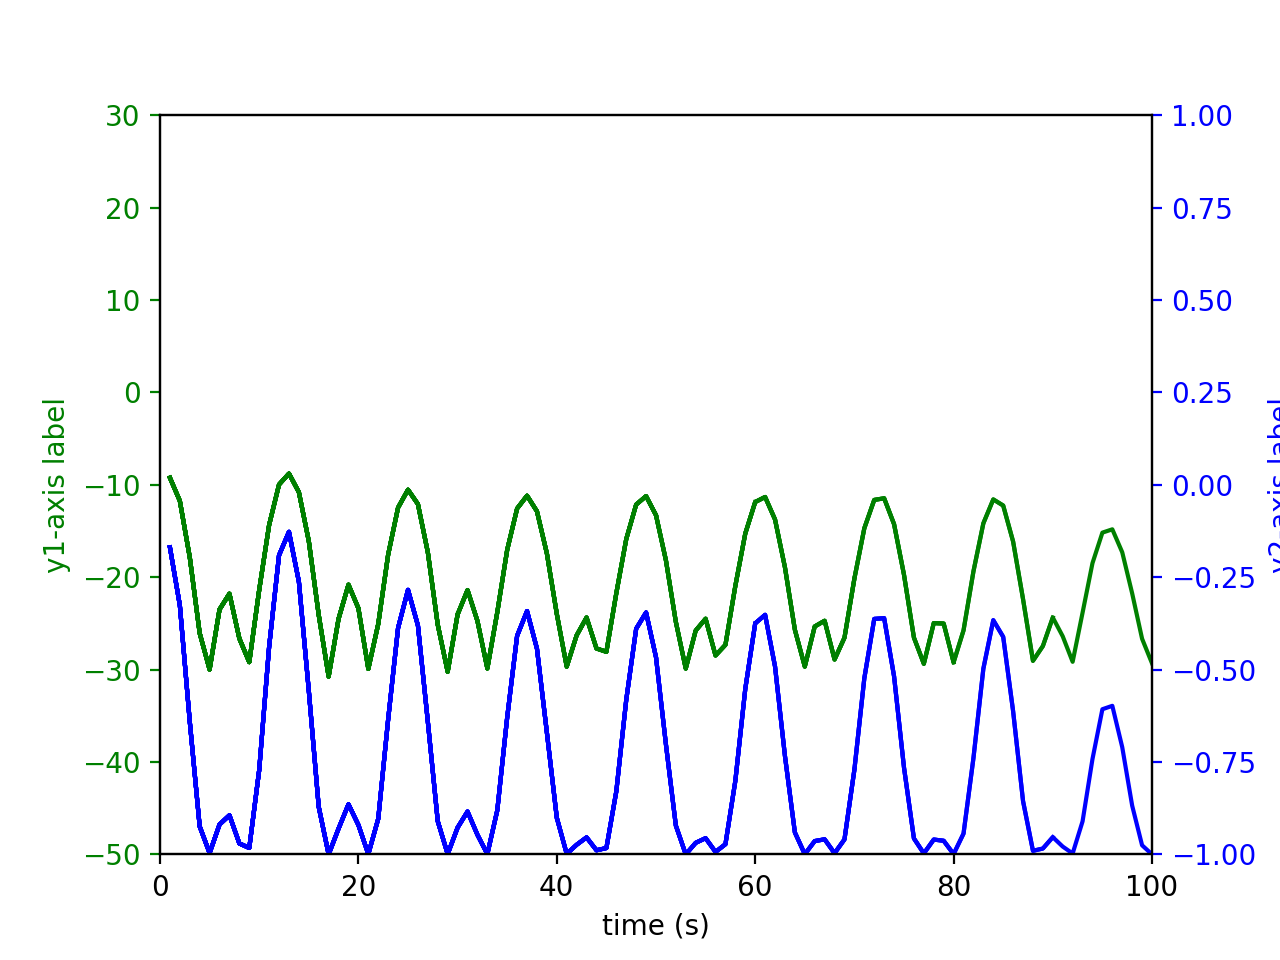

Episode =  500, total reward = -2122.301
Episode =  501, total reward = -2400.679
Episode =  502, total reward = -2341.828
Episode =  503, total reward = -2192.763
Episode =  504, total reward = -2346.819
Episode =  505, total reward = -2439.912
Episode =  506, total reward = -2288.766
Episode =  507, total reward = -2454.130
Episode =  508, total reward = -2279.787
Episode =  509, total reward = -2432.832
Episode =  510, total reward = -2494.438
Episode =  511, total reward = -2471.387
Episode =  512, total reward = -2143.740
Episode =  513, total reward = -2376.951
Episode =  514, total reward = -2324.841
Episode =  515, total reward = -2323.505
Episode =  516, total reward = -2487.932
Episode =  517, total reward = -2317.227
Episode =  518, total reward = -2336.418
Episode =  519, total reward = -2460.637
Episode =  520, total reward = -2340.382
Episode =  521, total reward = -2274.872
Episode =  522, total reward = -2232.524
Episode =  523, total reward = -1732.528
Episode =  524, 

<IPython.core.display.Javascript object>


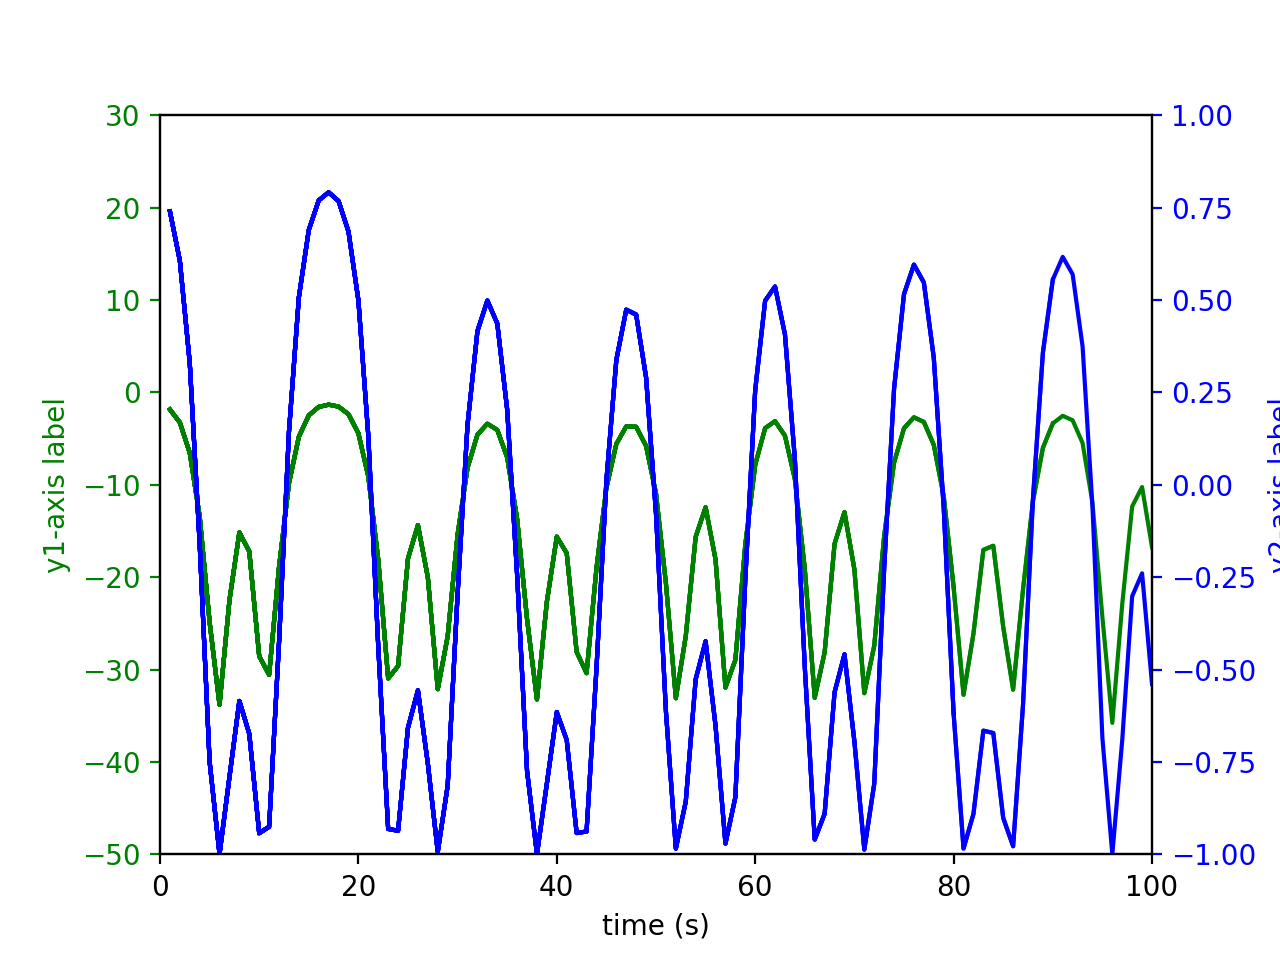

Episode =  550, total reward = -1591.864
Episode =  551, total reward = -2437.474
Episode =  552, total reward = -2422.619
Episode =  553, total reward = -2072.118
Episode =  554, total reward = -2324.771
Episode =  555, total reward = -2418.557
Episode =  556, total reward = -2351.144
Episode =  557, total reward = -1753.376
Episode =  558, total reward = -2314.964
Episode =  559, total reward = -2394.508
Episode =  560, total reward = -2486.917
Episode =  561, total reward = -2191.392
Episode =  562, total reward = -2464.495
Episode =  563, total reward = -2239.151
Episode =  564, total reward = -1881.362
Episode =  565, total reward = -2070.158
Episode =  566, total reward = -2487.667
Episode =  567, total reward = -2382.490
Episode =  568, total reward = -2353.245
Episode =  569, total reward = -2451.691
Episode =  570, total reward = -2178.603
Episode =  571, total reward = -1488.279
Episode =  572, total reward = -1737.888
Episode =  573, total reward = -2473.063
Episode =  574, 

<IPython.core.display.Javascript object>


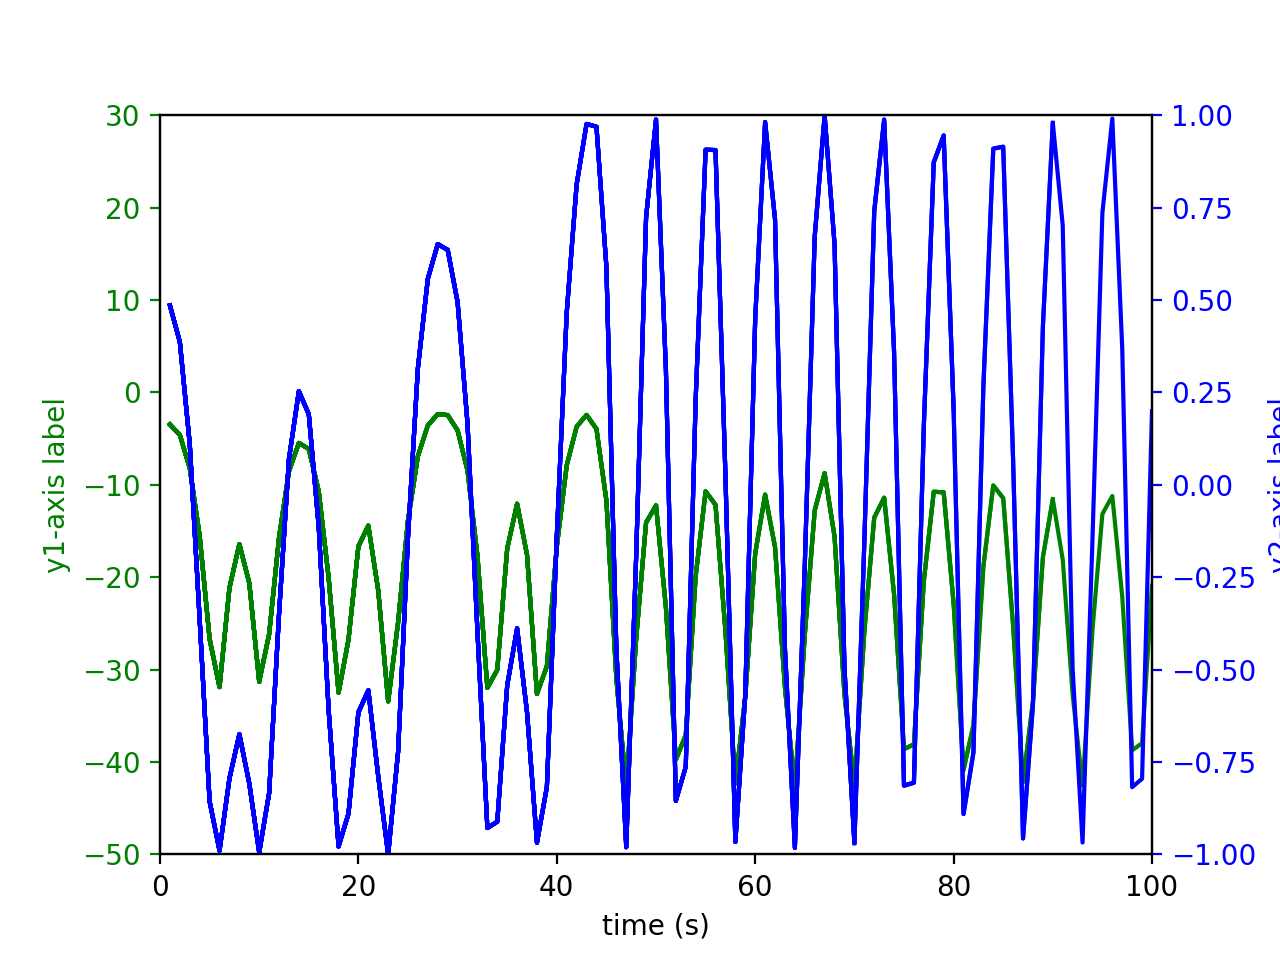

Episode =  600, total reward = -2085.917
Episode =  601, total reward = -1644.516
Episode =  602, total reward = -2326.409
Episode =  603, total reward = -2118.980
Episode =  604, total reward = -2217.949
Episode =  605, total reward = -2415.223
Episode =  606, total reward = -2465.270
Episode =  607, total reward = -2386.519
Episode =  608, total reward = -2092.703
Episode =  609, total reward = -1881.559
Episode =  610, total reward = -2477.495
Episode =  611, total reward = -2453.757
Episode =  612, total reward = -2300.202
Episode =  613, total reward = -2172.156
Episode =  614, total reward = -2075.138
Episode =  615, total reward = -2007.055
Episode =  616, total reward = -2323.372
Episode =  617, total reward = -2324.663
Episode =  618, total reward = -2417.938
Episode =  619, total reward = -2477.377
Episode =  620, total reward = -2065.233
Episode =  621, total reward = -2308.489
Episode =  622, total reward = -2351.852
Episode =  623, total reward = -2365.452
Episode =  624, 

<IPython.core.display.Javascript object>


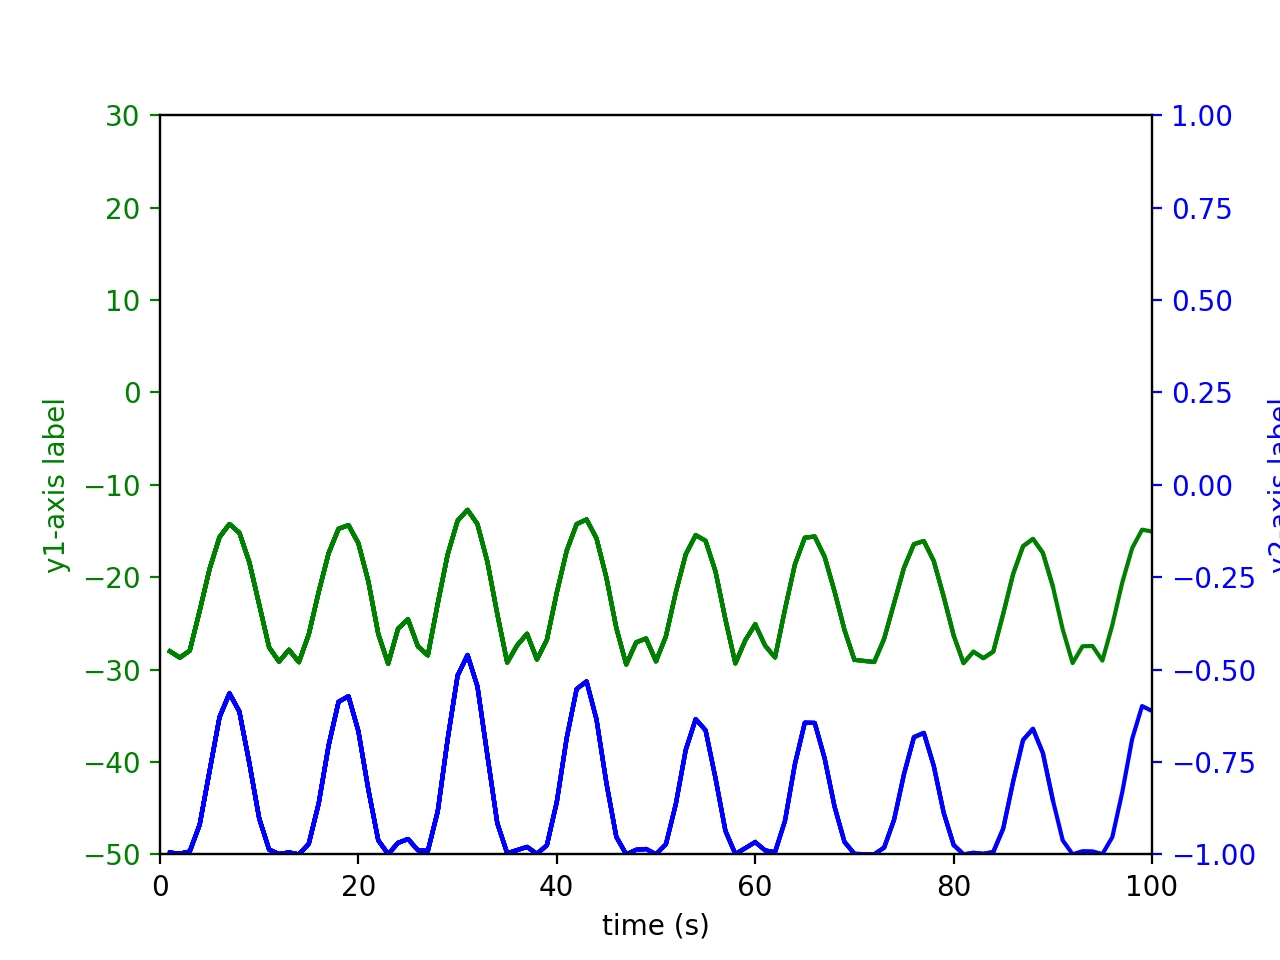

Episode =  650, total reward = -2271.696
Episode =  651, total reward = -1635.021
Episode =  652, total reward = -1542.818
Episode =  653, total reward = -2077.094
Episode =  654, total reward = -2022.135
Episode =  655, total reward = -2118.580
Episode =  656, total reward = -2457.436
Episode =  657, total reward = -2240.932
Episode =  658, total reward = -2385.546
Episode =  659, total reward = -2294.348
Episode =  660, total reward = -2328.119
Episode =  661, total reward = -2498.724
Episode =  662, total reward = -2252.588
Episode =  663, total reward = -2228.148
Episode =  664, total reward = -2363.508
Episode =  665, total reward = -2337.864
Episode =  666, total reward = -2304.889
Episode =  667, total reward = -2477.539
Episode =  668, total reward = -2257.246
Episode =  669, total reward = -2275.126
Episode =  670, total reward = -2465.397
Episode =  671, total reward = -2355.095
Episode =  672, total reward = -2438.137
Episode =  673, total reward = -2146.245
Episode =  674, 

<IPython.core.display.Javascript object>


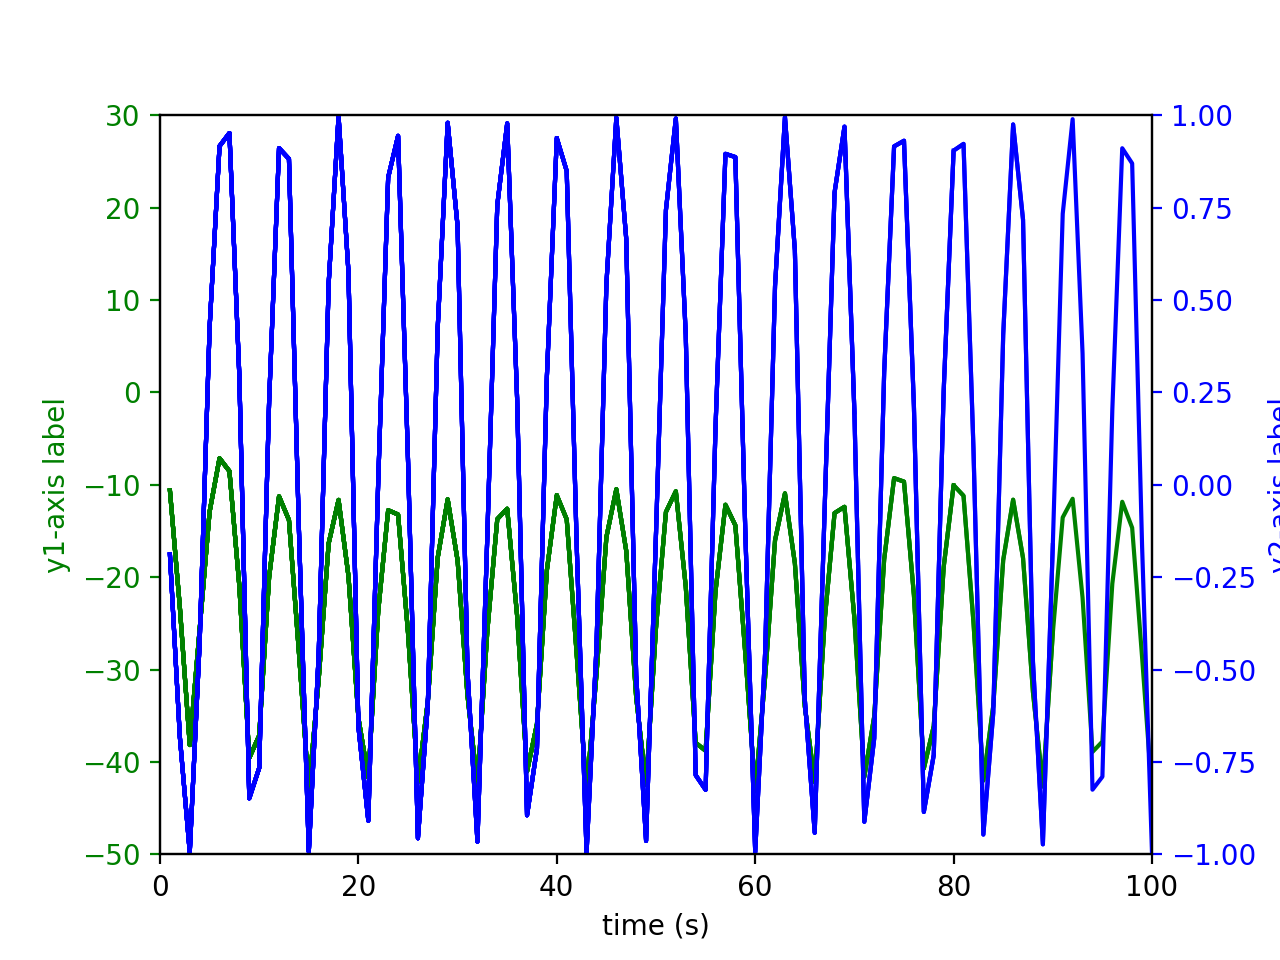

Episode =  700, total reward = -2457.433
Episode =  701, total reward = -2340.568
Episode =  702, total reward = -2372.894
Episode =  703, total reward = -2340.904
Episode =  704, total reward = -2483.088
Episode =  705, total reward = -2360.779
Episode =  706, total reward = -2246.274
Episode =  707, total reward = -2329.340
Episode =  708, total reward = -2487.964
Episode =  709, total reward = -2470.838
Episode =  710, total reward = -2460.521
Episode =  711, total reward = -2211.115
Episode =  712, total reward = -2313.484
Episode =  713, total reward = -2453.458
Episode =  714, total reward = -2358.537
Episode =  715, total reward = -2454.278
Episode =  716, total reward = -2384.411
Episode =  717, total reward = -2454.280
Episode =  718, total reward = -2335.714
Episode =  719, total reward = -2360.940
Episode =  720, total reward = -2441.182
Episode =  721, total reward = -2379.563
Episode =  722, total reward = -2329.206
Episode =  723, total reward = -2389.828
Episode =  724, 

<IPython.core.display.Javascript object>


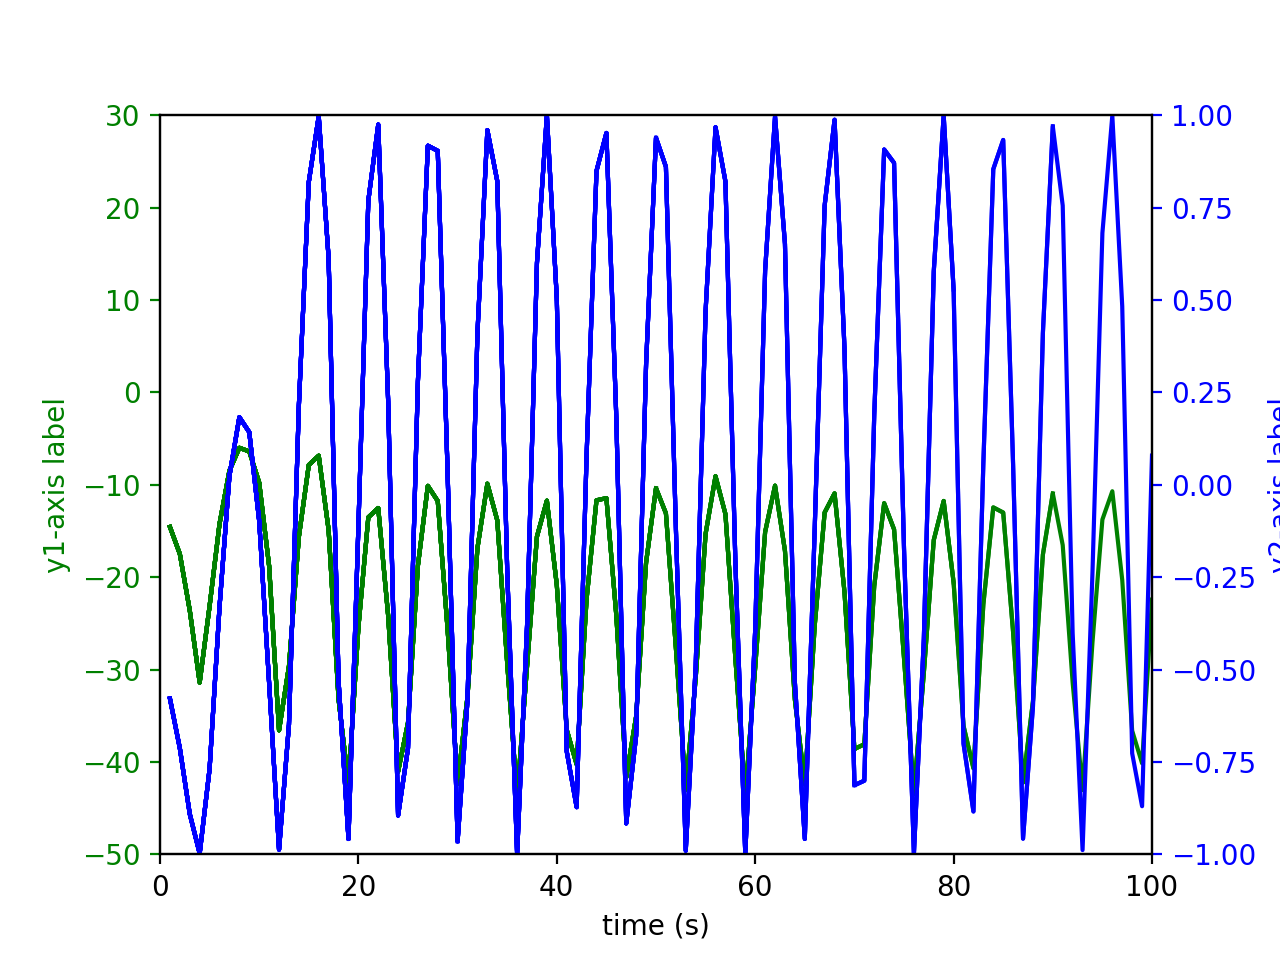

Episode =  750, total reward = -2346.296
Episode =  751, total reward = -2489.223
Episode =  752, total reward = -2301.061
Episode =  753, total reward = -2342.949
Episode =  754, total reward = -2696.247
Episode =  755, total reward = -2706.901
Episode =  756, total reward = -2703.954
Episode =  757, total reward = -2633.386
Episode =  758, total reward = -2383.517
Episode =  759, total reward = -2864.586
Episode =  760, total reward = -2861.679
Episode =  761, total reward = -2041.491
Episode =  762, total reward = -2479.803
Episode =  763, total reward = -1622.327
Episode =  764, total reward = -2449.823
Episode =  765, total reward = -2856.180
Episode =  766, total reward = -2361.841
Episode =  767, total reward = -2488.892
Episode =  768, total reward = -1313.889
Episode =  769, total reward = -2472.332
Episode =  770, total reward = -1804.437
Episode =  771, total reward = -2561.864
Episode =  772, total reward = -2844.195
Episode =  773, total reward = -2347.569
Episode =  774, 

<IPython.core.display.Javascript object>


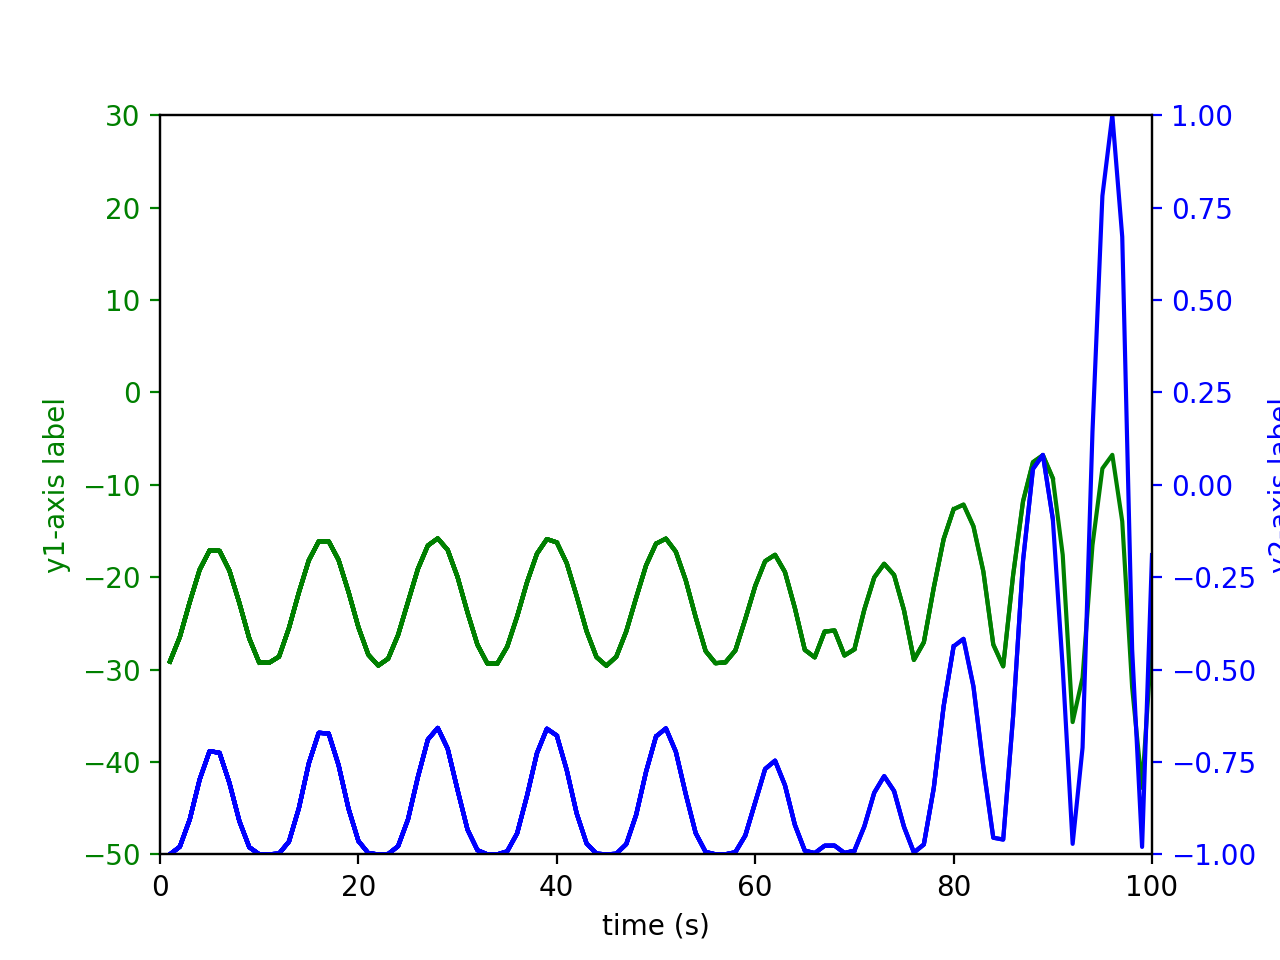

Episode =  800, total reward = -2237.479
Episode =  801, total reward = -2060.536
Episode =  802, total reward = -2402.549
Episode =  803, total reward = -2395.444
Episode =  804, total reward = -2328.346
Episode =  805, total reward = -2270.920
Episode =  806, total reward = -2201.119
Episode =  807, total reward = -2398.413
Episode =  808, total reward = -2428.972
Episode =  809, total reward = -2352.492
Episode =  810, total reward = -2439.006
Episode =  811, total reward = -2350.893
Episode =  812, total reward = -2331.435
Episode =  813, total reward = -2345.683
Episode =  814, total reward = -2339.193
Episode =  815, total reward = -2408.038
Episode =  816, total reward = -2410.017
Episode =  817, total reward = -2330.540
Episode =  818, total reward = -2202.484
Episode =  819, total reward = -2354.582
Episode =  820, total reward = -2307.125
Episode =  821, total reward = -2469.176
Episode =  822, total reward = -2422.298
Episode =  823, total reward = -2441.170
Episode =  824, 

<IPython.core.display.Javascript object>


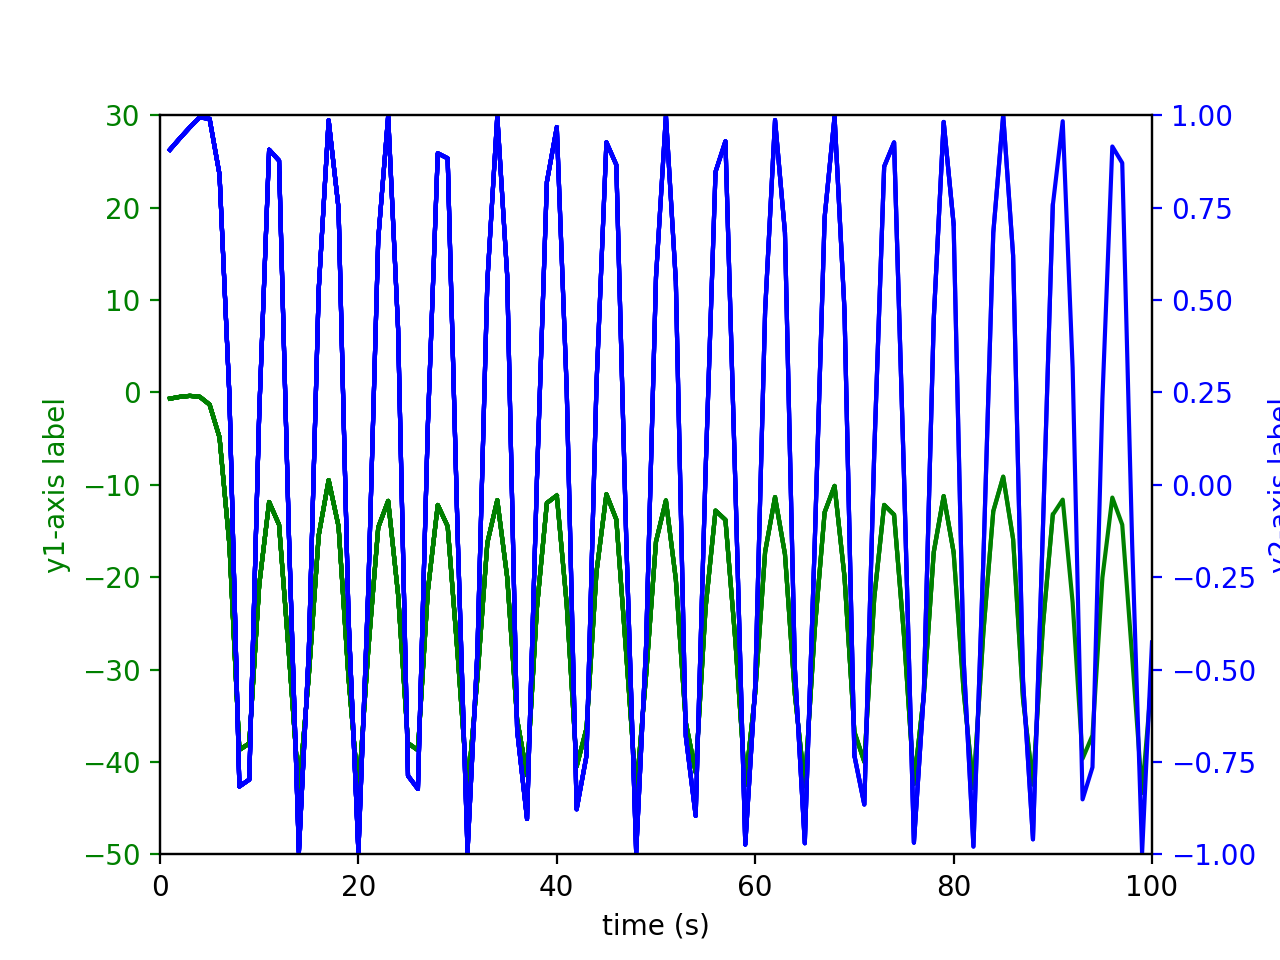

Episode =  850, total reward = -2352.058
Episode =  851, total reward = -1827.037
Episode =  852, total reward = -2495.727
Episode =  853, total reward = -2498.968
Episode =  854, total reward = -2281.351
Episode =  855, total reward = -2211.396
Episode =  856, total reward = -2491.720
Episode =  857, total reward = -2469.407
Episode =  858, total reward = -2395.127
Episode =  859, total reward = -2341.339
Episode =  860, total reward = -2368.675
Episode =  861, total reward = -2492.333
Episode =  862, total reward = -2501.811
Episode =  863, total reward = -2416.280
Episode =  864, total reward = -2406.443
Episode =  865, total reward = -2446.483
Episode =  866, total reward = -2397.015
Episode =  867, total reward = -2390.601
Episode =  868, total reward = -2486.805
Episode =  869, total reward = -2352.963
Episode =  870, total reward = -2385.608
Episode =  871, total reward = -2349.272
Episode =  872, total reward = -2445.793
Episode =  873, total reward = -2347.851
Episode =  874, 

<IPython.core.display.Javascript object>


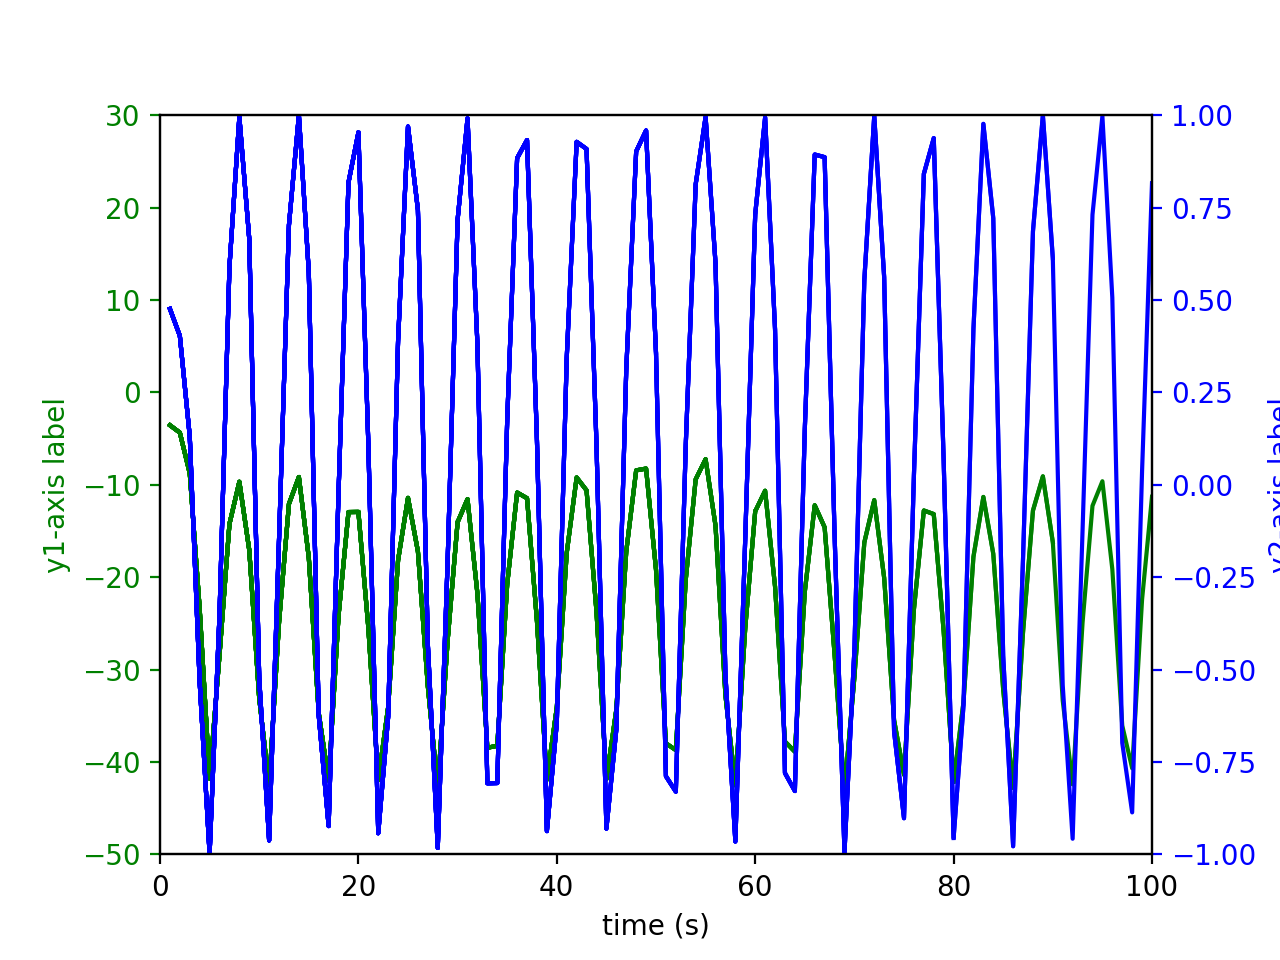

Episode =  900, total reward = -2349.940
Episode =  901, total reward = -2368.087
Episode =  902, total reward = -2443.112
Episode =  903, total reward = -2364.896
Episode =  904, total reward = -2378.367
Episode =  905, total reward = -2271.032
Episode =  906, total reward = -2481.436
Episode =  907, total reward = -2397.031
Episode =  908, total reward = -2351.802
Episode =  909, total reward = -2370.956
Episode =  910, total reward = -2479.214
Episode =  911, total reward = -2427.244
Episode =  912, total reward = -2329.011
Episode =  913, total reward = -2457.035
Episode =  914, total reward = -2404.027
Episode =  915, total reward = -2302.183
Episode =  916, total reward = -2354.206
Episode =  917, total reward = -2357.501
Episode =  918, total reward = -2446.732
Episode =  919, total reward = -2383.656
Episode =  920, total reward = -2408.956
Episode =  921, total reward = -2472.553
Episode =  922, total reward = -2431.320
Episode =  923, total reward = -2391.764
Episode =  924, 

<IPython.core.display.Javascript object>


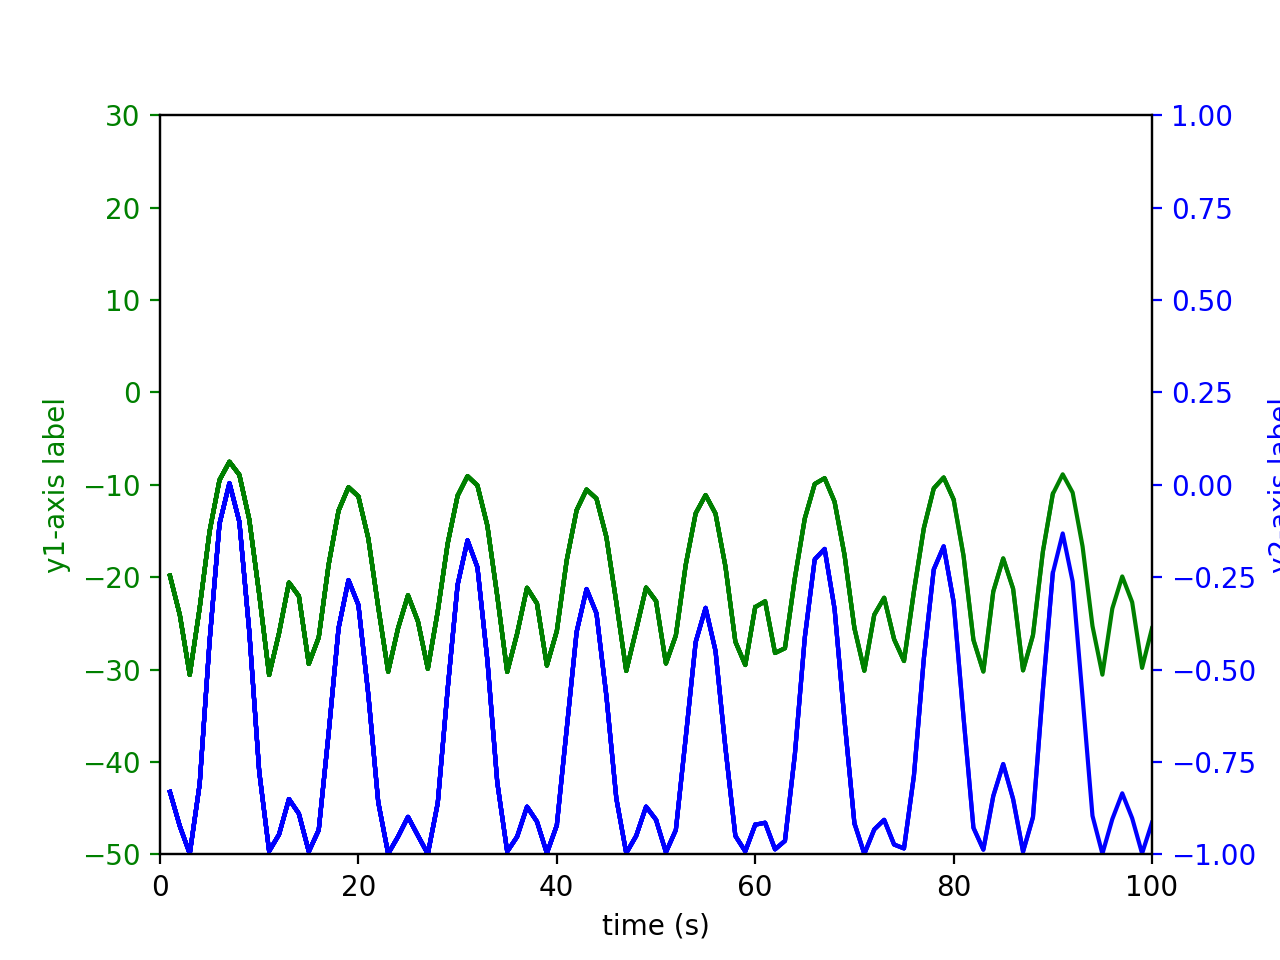

Episode =  950, total reward = -2054.849
Episode =  951, total reward = -2136.514
Episode =  952, total reward = -1672.100
Episode =  953, total reward = -2339.737
Episode =  954, total reward = -2472.484
Episode =  955, total reward = -2473.722
Episode =  956, total reward = -2380.744
Episode =  957, total reward = -1994.951
Episode =  958, total reward = -2003.242
Episode =  959, total reward = -2090.855
Episode =  960, total reward = -1733.892
Episode =  961, total reward = -2446.089
Episode =  962, total reward = -2137.861
Episode =  963, total reward = -1905.907
Episode =  964, total reward = -1997.174
Episode =  965, total reward = -1583.290
Episode =  966, total reward = -2128.783
Episode =  967, total reward = -1659.896
Episode =  968, total reward = -2319.412
Episode =  969, total reward = -2183.788
Episode =  970, total reward = -1996.399
Episode =  971, total reward = -2087.738
Episode =  972, total reward = -1767.067
Episode =  973, total reward = -2335.008
Episode =  974, 

<IPython.core.display.Javascript object>


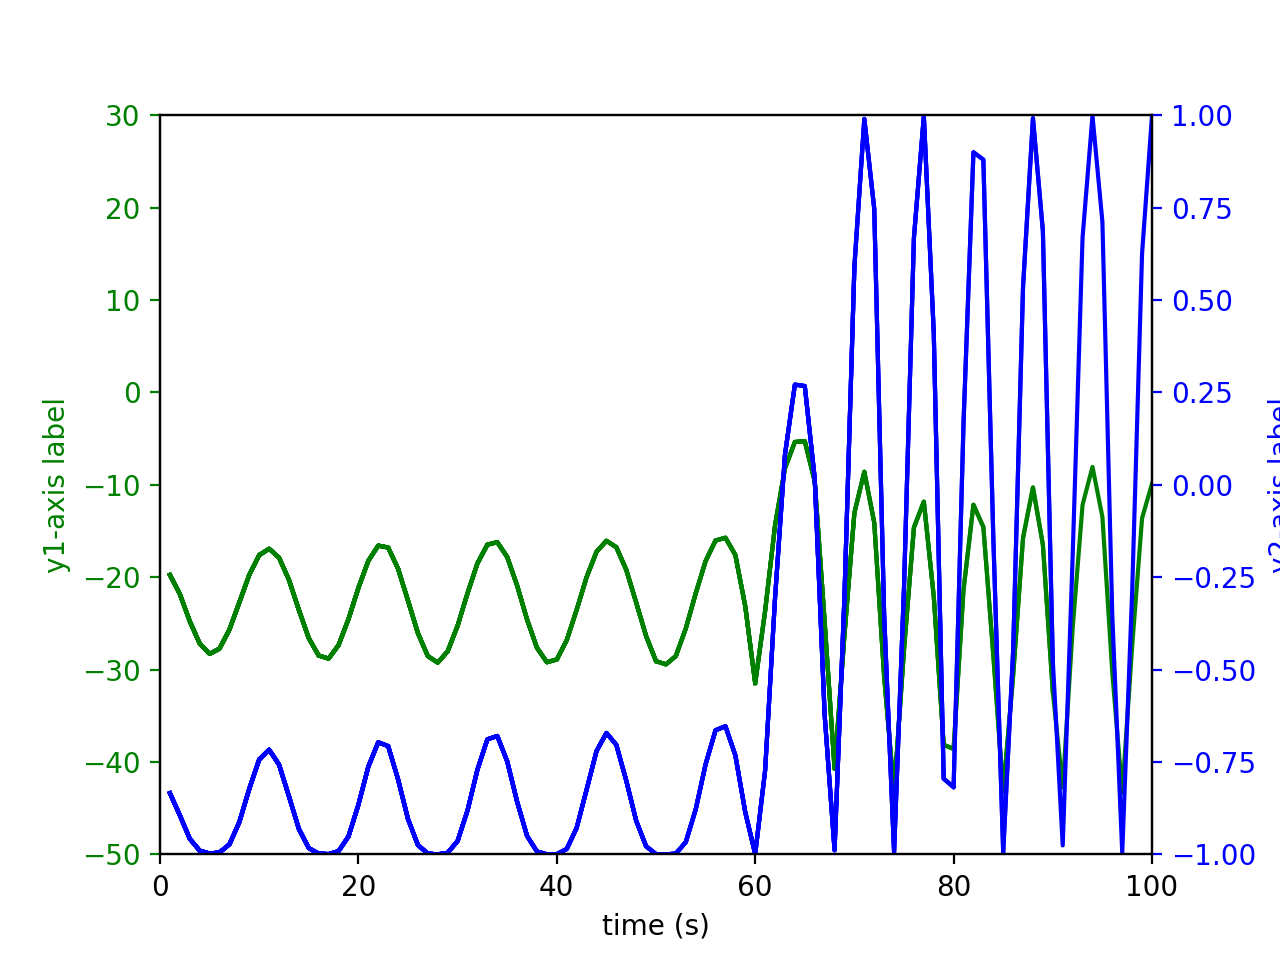

Episode = 1000, total reward = -2259.981


In [2]:
# you must include '%matplotlib notebook' for this to work
%matplotlib notebook

import gym
import sys
from agents.agent import DDPG
from pendulum_task import PendulumTask

num_episodes = 1000
task = PendulumTask()
agent = DDPG(task) 

display_freq = 50
display_step_freq = 10

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    
    
    display_graph = i_episode % display_freq == 0
    if display_graph:
        # prior to the start of each episode, clear the datapoints
        x, y1, y2 = [], [], []    
        fig, sub1, sub2 = plt_init()

    step = 0
    total_reward = 0
    
    while True:
        step += 1
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_reward += reward
        # within the episode loop
        if display_graph:
            x.append(step) # time
            y1.append(reward) # y-axis 1 values
            y2.append(next_state[0]) # y-axis 2 values
            
            if step % display_step_freq == 0:
                plt_dynamic(fig, sub1, sub2, x, y1, y2)
            
            #print(task.current_steps)
            #print(f'Episode number {i_episode}')
            #print(f'action {action}, reward {reward}, next_state {next_state}, done {done}')
        #    print(f'Plot values - time {task.sim.time}, reward {reward}, z {task.sim.pose[2]}')
        #if done:
        #    print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
        #        i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
        #    break
        if done:
            print("\rEpisode = {:4d}, total reward = {:7.3f}".format(
                i_episode, total_reward))  # [debug]
        #    if (episode % display_freq == 0) and (display_graph == True):
        #               plt_dynamic(x, y1, y2)
            break

    #if display_graph:  
    #    plt_clear(fig)
    #sys.stdout.flush()

In [ ]:
init_pose = [0., 0., 10., 0., 0., 0.]
inital_velocity = [0., 0., 0.]
init_angle_velocities = [0., 0., 0.]

In [ ]:
import matplotlib as plt

# you must include '%matplotlib notebook' for this to work
%matplotlib notebook

time_limit = 1
y1_lower = -10
y1_upper = 10
y2_lower = 0
y2_upper = 20

# generate plot function
def plt_dynamic(x, y1, y2, color_y1='g', color_y2='b'):
   sub1.plot(x, y1, color_y1)
   sub2.plot(x, y2, color_y2)
   fig.canvas.draw()

# create plots
fig, sub1= plt.subplots(1,1)
sub2 = sub1.twinx()

# set plot boundaries
sub1.set_xlim(0, time_limit) # this is typically time
sub1.set_ylim(y1_lower, y1_upper) # limits to your y1
sub2.set_xlim(0, time_limit) # time, again
sub2.set_ylim(y2_lower, y2_upper) # limits to your y2

# set labels and colors for the axes
sub1.set_xlabel('time (s)', color='k') 
sub1.set_ylabel('y1-axis label', color='g')
sub1.tick_params(axis='x', colors='k')
sub1.tick_params(axis='y', colors="g")

sub2.set_ylabel('y2-axis label', color='b') 
sub2.tick_params(axis='y', colors='b')

In [ ]:
x, y1, y2 = [], [], [] 

for i in range(100):
    x.append(i)
    y1.append(i)
    y2.append(2 * i)
    plt_dynamic(x, y1, y2)

In [ ]:
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task

num_episodes = 100
target_pos = np.array([0., 0., 20.])
task = Task(init_pose=init_pose, init_velocities=init_velocities,
            init_angle_velocities=init_angle_velocities,target_pos=target_pos)
agent = DDPG(task) 

display_graph = True
display_freq = 5

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    
    # prior to the start of each episode, clear the datapoints
    x, y1, y2 = [], [], []    
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        # within the episode loop
        if (i_episode % display_freq == 0) and (display_graph == True):
            x.append(task.sim.time) # time
            y1.append(reward) # y-axis 1 values
            y2.append(task.sim.pose[2]) # y-axis 2 values
        
            print(f'Episode number {i_episode}')
            print(f'action {action}, reward {reward}, next_state {next_state}, done {done}')
            print(f'Plot values - time {task.sim.time}, reward {reward}, z {task.sim.pose[2]}')
        #if done:
        #    print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
        #        i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
        #    break
        if done:
            print("\rEpisode = {:4d}, reward = {:7.3f}".format(
                i_episode, reward), end="")  # [debug]
            if (episode % display_freq == 0) and (display_graph == True):
                       plt_dynamic(x, y1, y2)
            break
       
    sys.stdout.flush()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
## TODO: Plot the rewards.

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: